In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import plotly.graph_objects as go
from ipywidgets import VBox

In [2]:
dt = pd.read_csv('data1.csv').dropna()

dt.columns.tolist()

['Unnamed: 0', 'Ic', 'errIc', 'J', 'errJ', 'Ic-J', 'M', 'log(M)']

Plot del CMD, con un colobar log(M). Necesito averiguar si se ajustaron dos isocronas o simplemente de un grafico de fill_between() como bandas de confianza.


In [3]:
import plotly.graph_objects as go

columns = [dt['Unnamed: 0'], dt['Ic'], dt['errIc'], dt['J'],dt['errJ'], dt['Ic-J'], dt['M'], dt['log(M)']]

def updatePlotData(index, columns):
    star_data = dt[index]
    return {col: star_data[col] for col in columns}

In [6]:
# Calculate the color
color = dt['Ic'] - dt['J']
mass = dt['log(M)']

# Add the color as a new column to the table (optional)
dt['Color'] = color

# Create the figure
fig = go.FigureWidget()

# Add the CMD scatter plot
scatter = fig.add_trace(go.Scatter(
    x=dt['Color'],  # Color (e.g., Ic - J)
    y=dt['Ic'],  # Magnitude (e.g., Ic)
    mode='markers',
    marker=dict(
        size=5,
        color=dt['log(M)'],  
        colorscale='Rainbow',
        colorbar=dict(title='log(M)'),
        showscale=True,
        reversescale=True
    ),
    hovertemplate='Color: %{x}<br>Magnitude: %{y}<extra></extra>',
    name='CMD'
))

# Invert the y-axis for magnitude
fig.update_yaxes(autorange='reversed')

# Update layout
fig.update_layout(
    title='Color-Magnitude Diagram (CMD)',
    xaxis_title='Ic - J',
    yaxis_title='Ic',
    height=600,
    width=800
)

# Create a table FigureWidget that updates on selection from points in the scatter plot of f
table = go.FigureWidget([go.Table(
    header=dict(values=['Ic', 'errIc', 'J', 'errJ', 'Ic-J', 'M', 'log(M)'],
                fill=dict(color='#C2D4FF'),
                align=['left'] * 5),
    cells=dict(values=[dt[col] for col in ['Ic', 'errIc', 'J', 'errJ', 'Color', 'M', 'log(M)']],
               fill=dict(color='#F5F8FF'),
               align=['left'] * 5))
])

# Function to update the table on selection
def selection_fn(trace, points, selector):
    inds = points.point_inds
    if inds:
        selected_data = dt.iloc[inds]
        table.data[0].cells.values = [selected_data[col].tolist() for col in ['Ic', 'errIc', 'J', 'errJ', 'Color', 'M', 'log(M)']]
    else:
        table.data[0].cells.values = [dt[col].tolist() for col in ['Ic', 'errIc', 'J', 'errJ', 'Color', 'M', 'log(M)']]

fig.data[0].on_selection(selection_fn)

# Display the figure and table
display(VBox([fig, table]))

    'data': [{'hovertemplate': 'Color: %{x}<br>Magnitude: %{y}<extra></extra>',
…

In [11]:
# Sample data for demonstration
data = {
    'Ic': [10, 15, 20, 5, 25, 10],
    'errIc': [0.1, 0.2, 0.15, 0.1, 0.2, 0.1],
    'J': [8, 12, 18, 3, 20, 7],
    'errJ': [0.05, 0.1, 0.08, 0.05, 0.1, 0.05],
    'M': [1, 0.5, 0.2, 0.8, 0.3, 0.6],
    'log(M)': [0, -0.301, -0.699, -0.097, -0.522, -0.222]
}

# Create DataFrame
dt = pd.DataFrame(data)
dt['Color'] = dt['Ic'] - dt['J']

# Create scatter plot figure
fig = go.FigureWidget()

scatter = fig.add_trace(go.Scatter(
    x=dt['Color'],
    y=dt['Ic'],
    mode='markers',
    marker=dict(
        size=5,
        color=dt['log(M)'],
        colorscale='Rainbow',
        colorbar=dict(title='log(M)'),
        showscale=True,
        reversescale=True
    ),
    hovertemplate='Color: %{x}<br>Magnitude: %{y}<extra></extra>',
    name='CMD'
))

# Invert the y-axis for magnitude
fig.update_yaxes(autorange='reversed')

# Update layout
fig.update_layout(
    title='Color-Magnitude Diagram (CMD)',
    xaxis_title='Ic - J',
    yaxis_title='Ic',
    height=600,
    width=800
)

# Create a table figure widget
table = go.FigureWidget([go.Table(
    header=dict(values=['Ic', 'errIc', 'J', 'errJ', 'Color', 'M', 'log(M)'],
                fill_color='#C2D4FF',
                align='left'),
    cells=dict(values=[dt[col] for col in ['Ic', 'errIc', 'J', 'errJ', 'Color', 'M', 'log(M)']],
               fill_color='#F5F8FF',
               align='left'))
])

# Function to update the table based on scatter plot selection
def selection_fn(trace, points, selector):
    inds = points.point_inds
    if inds:
        selected_data = dt.iloc[inds]
        table.data[0].cells.values = [selected_data[col].tolist() for col in ['Ic', 'errIc', 'J', 'errJ', 'Color', 'M', 'log(M)']]
    else:
        table.data[0].cells.values = [dt[col].tolist() for col in ['Ic', 'errIc', 'J', 'errJ', 'Color', 'M', 'log(M)']]

# Link the selection function to the scatter plot
fig.data[0].on_selection(selection_fn)

# Display the figure and table in a VBox
display(VBox([fig, table]))

    'data': [{'hovertemplate': 'Color: %{x}<br>Magnitude: %{y}<extra></extra>',
…

In [10]:
# mass_function_hist=np.histogram(dt['log(M)'], bins = 20)
# mass_function_data = [mass_function_hist[0], 0.5 * (mass_function_hist[1][1:] + mass_function_hist[1][:-1])]
# xdata = mass_function_data[1]
# ydata = mass_function_data[0]

# # Plotting the main data
# plt.errorbar(xdata,ydata, yerr = np.sqrt(ydata), marker = 'o')
# plt.yscale('log')
# plt.ylabel('$\log_{10}(N)')
# plt.grid(True,alpha=0.3)

array([  16,   42,   98,  241,  355,  583,  799, 1109, 1234, 1328, 1260,
       1025,  796,  521,  292,  153,   75,   43,   13,    5], dtype=int64)

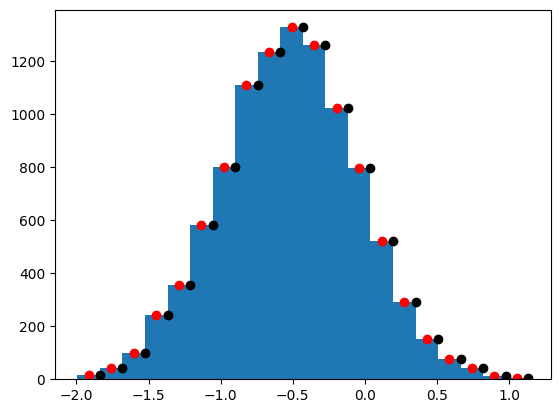

In [11]:
# Calcular los datos de la función de masa
hist_data = np.histogram(dt['log(M)'], bins=20)
mass_function_data = [hist_data[0], 0.5 * (hist_data[1][1:] + hist_data[1][:-1])] #promedio de los puntos para evitar que se corra el hist
mass_function_data_2=[hist_data[0], hist_data[1][1:]]

xdata = mass_function_data[1]
ydata = mass_function_data[0]

xdata_2 = mass_function_data_2[1]
ydata_2 = mass_function_data_2[0]


plt.hist(dt['log(M)'],bins=20)
plt.plot(xdata_2,ydata_2,'ok')
plt.plot(xdata,ydata,'or')
hist_data[0]

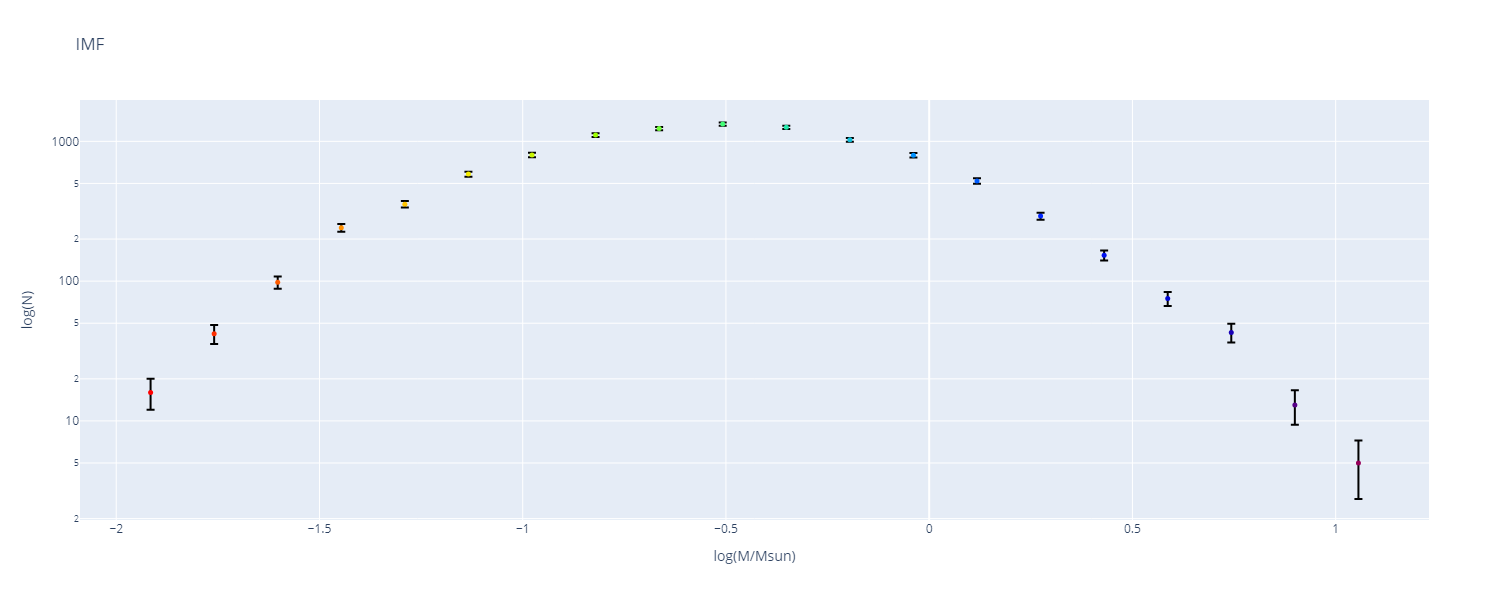

In [12]:
fig_hist = go.Histogram(x=dt['log(M)'], nbinsx=20)

fig=go.Figure()

fig.add_trace(go.Scatter(
    x=xdata,  # x-axis positions (bin centers)
    y=ydata,  # y-axis values (histogram bar heights)
    mode='markers',
    marker=dict(
        size=5,
        color=xdata,  # Color based on xdata values
        colorscale='Rainbow',
        showscale=False,
        reversescale=True,
    ),
    error_y=dict(
        type='data',
        array=np.sqrt(ydata),  # y-error based on the square root of ydata
        visible=True
    ),
    hovertemplate='IMF adjustment',
    name='IMF'
))

# Invert the y-axis and apply a logarithmic scale if necessary
fig.update_yaxes(type='log')

fig.update_layout(
    title='IMF',
    xaxis_title='log(M/Msun)',  # Correct LaTeX formatting
    yaxis_title='log(N)',
    height=600,
    width=800
)

# Display the figure
fig.show()

Defino las funciones de IMF

In [13]:
# import scipy.optimize as sc

# def powerlaw(x,c,gamma):
#     return(c*x**(-gamma))
    
# def two_segment_powerlaw(x,gamma1,gamma2,c):
#     return(np.piecewise(x,[x<0.4,x>0.4],[lambda x: c*x**(-gamma1), lambda x :c*(0.4)**(gamma2-gamma1)*x**(-gamma2)]))

# def kroupa(x,gamma1,gamma2,gamma3,gamma4,c):
#     return(np.piecewise(x,[(x >= 0.01) & (x < 0.08), (x >= 0.08) & (x < 0.5), (x >= 0.5) & (x < 1), x >= 1], [lambda x : c*x**(-gamma1), lambda x : c*x**(-gamma2), lambda x: c*x**(-gamma3), lambda x : c*x**(-gamma4)]))
 
# def lognormal_and_powerlaw(x,c,logmc,sigma,gamma):
#     return(np.piecewise(x,[x<1,x>1],[lambda x: c*np.e**(-(np.log10(x)-logmc)**2/(2*sigma**2)), lambda x :(c*np.e**(-(logmc**2)/(2*sigma**2)))*x**(-gamma)]))
    
# def tapered_powerlaw(x,c,gamma,mp,beta):
#     return(((c*x**(-gamma))*(1-np.e**(-(x/mp)**beta))))
    
# def lognormal(x,c,logmc,sigma):
#     return(c*np.e**(-(np.log10(x)-logmc)**2/(2*sigma**2)))

In [14]:
# mask=xdata>0
# salpeter = sc.curve_fit(powerlaw,10**xdata[mask],ydata[mask])

# plt.plot(xdata,np.log10(ydata), color='black')
# plt.plot(xdata[mask],np.log10(powerlaw(10**xdata[mask],salpeter[0][0],salpeter[0][1])), '--' , color='red',linewidth=3)

In [15]:
# lognorm = sc.curve_fit(lognormal,10**xdata,ydata)
# plt.plot(xdata, np.log10(ydata), color = 'black')
# plt.plot(xdata, np.log10(lognormal(10**xdata, lognorm[0][0], lognorm[0][1], lognorm[0][2])), '-*',color = 'blue', linewidth = 2)

In [16]:
# chabrier =sc.curve_fit(lognormal_and_powerlaw, 10**xdata,ydata)

# chabrier

# plt.plot(xdata, np.log10(ydata), color = 'black')
# plt.plot(xdata, np.log10(lognormal_and_powerlaw(10**xdata, chabrier[0][0],chabrier[0][1], chabrier[0][2], chabrier[0][3])), 'o-', color = 'green', linewidth = 2)

In [17]:
# tapered =sc.curve_fit(tapered_powerlaw, 10**xdata, ydata)

# plt.plot(xdata, np.log10(ydata), color = 'black')
# plt.plot(xdata, np.log10(tapered_powerlaw(10**xdata, tapered[0][0],tapered[0][1], tapered[0][2], tapered[0][3])), 'o-', color = 'purple', linewidth = 2)

In [18]:
# kroupa_fit =sc.curve_fit(kroupa, 10**xdata, ydata)

# kroupa_fit[0]

# plt.plot(xdata, np.log10(ydata), color = 'black')
# plt.plot(xdata, np.log10(kroupa(10**xdata,kroupa_fit[0][0], kroupa_fit[0][1], kroupa_fit[0][2], kroupa_fit[0][3], kroupa_fit[0][4])), '-or' )


In [19]:
# logm=[]
# for i in range(5000):
#     logm.append(np.random.normal(np.log10(0.2), 0.6))


In [20]:
 # Calcular los datos de la función de masa
# hist_data = np.histogram(dt['log(M)'], bins=20)
# mass_function_data = [hist_data[0], 0.5 * (hist_data[1][1:] + hist_data[1][:-1])] #promedio de los puntos para evitar que se corra el hist

# xdata = mass_function_data[1]
# ydata = mass_function_data[0]


# def powerlaw(x,c,gamma):
#     return(c*x**(-gamma))
    
# def two_segment_powerlaw(x,gamma1,gamma2,c):
#     return(np.piecewise(x,[x<0.4,x>0.4],[lambda x: c*x**(-gamma1), lambda x :c*(0.4)**(gamma2-gamma1)*x**(-gamma2)]))

# def kroupa(x,gamma1,gamma2,gamma3,gamma4,c):
#     return(np.piecewise(x,[(x >= 0.01) & (x < 0.08), (x >= 0.08) & (x < 0.5), (x >= 0.5) & (x < 1), x >= 1], [lambda x : c*x**(-gamma1), lambda x : c*x**(-gamma2), lambda x: c*x**(-gamma3), lambda x : c*x**(-gamma4)]))
 
# def lognormal_and_powerlaw(x,c,logmc,sigma,gamma):
#     return(np.piecewise(x,[x<1,x>1],[lambda x: c*np.e**(-(np.log10(x)-logmc)**2/(2*sigma**2)), lambda x :(c*np.e**(-(logmc**2)/(2*sigma**2)))*x**(-gamma)]))
    
# def tapered_powerlaw(x,c,gamma,mp,beta):
#     return(((c*x**(-gamma))*(1-np.e**(-(x/mp)**beta))))
    
# def lognormal(x,c,logmc,sigma):
#     return(c*np.e**(-(np.log10(x)-logmc)**2/(2*sigma**2)))

# #--------------------------------------------------------------------------------------------------------------------------------------------------------------------
# mask=xdata>0
# salpeter = sc.curve_fit(powerlaw,10**xdata[mask],ydata[mask])

# plt.figure()
# plt.plot(xdata,np.log10(ydata), color='black')
# plt.plot(xdata[mask],np.log10(powerlaw(10**xdata[mask],salpeter[0][0],salpeter[0][1])), '--' , color='red',linewidth=3)

# #--------------------------------------------------------------------------------------------------------------------------------------------------------------------
# lognorm = sc.curve_fit(lognormal,10**xdata,ydata)

# plt.figure()
# plt.plot(xdata, np.log10(ydata), color = 'black')
# plt.plot(xdata, np.log10(lognormal(10**xdata, lognorm[0][0], lognorm[0][1], lognorm[0][2])), '-o',color = 'blue', linewidth = 2)

# #--------------------------------------------------------------------------------------------------------------------------------------------------------------------
# chabrier =sc.curve_fit(lognormal_and_powerlaw, 10**xdata,ydata)

# plt.figure()
# plt.plot(xdata, np.log10(ydata), color = 'black')
# plt.plot(xdata, np.log10(lognormal_and_powerlaw(10**xdata, chabrier[0][0],chabrier[0][1], chabrier[0][2], chabrier[0][3])), 'o-', color = 'green', linewidth = 2)

# #--------------------------------------------------------------------------------------------------------------------------------------------------------------------
# tapered =sc.curve_fit(tapered_powerlaw, 10**xdata, ydata)

# plt.figure()
# plt.plot(xdata, np.log10(ydata), color = 'black')
# plt.plot(xdata, np.log10(tapered_powerlaw(10**xdata, tapered[0][0],tapered[0][1], tapered[0][2], tapered[0][3])), 'o-', color = 'purple', linewidth = 2)

# #--------------------------------------------------------------------------------------------------------------------------------------------------------------------
# kroupa_fit =sc.curve_fit(kroupa, 10**xdata, ydata)

# plt.figure()
# plt.plot(xdata, np.log10(ydata), color = 'black')
# plt.plot(xdata, np.log10(kroupa(10**xdata,kroupa_fit[0][0], kroupa_fit[0][1], kroupa_fit[0][2], kroupa_fit[0][3], kroupa_fit[0][4])), '-o', color='orange' )

C:\Users\usuario\AppData\Local\Temp\ipykernel_4296\3877786175.py:22: RuntimeWarning:

invalid value encountered in power

C:\Users\usuario\AppData\Local\Temp\ipykernel_4296\3877786175.py:16: RuntimeWarning:

overflow encountered in power



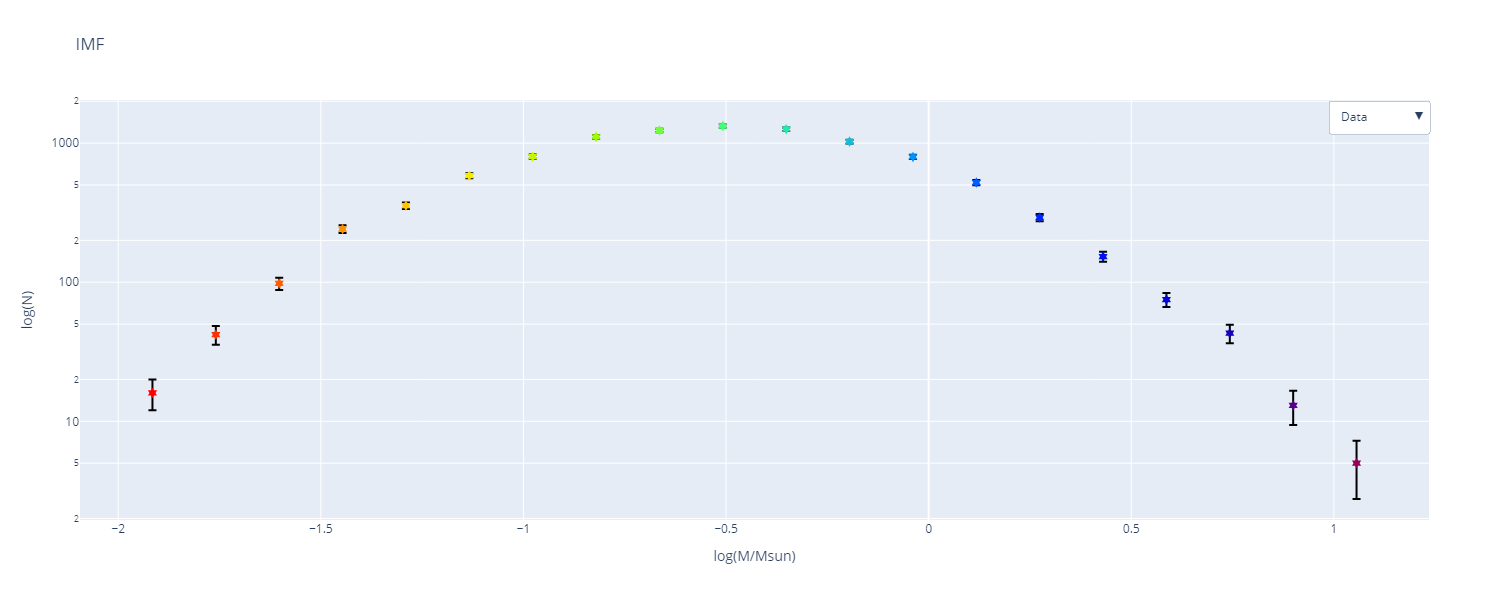

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import plotly.graph_objects as go



def powerlaw(x,c,gamma):
    return(c*x**(-gamma))
    
def two_segment_powerlaw(x,gamma1,gamma2,c):
    return(np.piecewise(x,[x<0.4,x>0.4],[lambda x: c*x**(-gamma1), lambda x :c*(0.4)**(gamma2-gamma1)*x**(-gamma2)]))

def kroupa(x,gamma1,gamma2,gamma3,gamma4,c):
    return(np.piecewise(x,[(x >= 0.01) & (x < 0.08), (x >= 0.08) & (x < 0.5), (x >= 0.5) & (x < 1), x >= 1], [lambda x : c*x**(-gamma1), lambda x : c*x**(-gamma2), lambda x: c*x**(-gamma3), lambda x : c*x**(-gamma4)]))
 
def lognormal_and_powerlaw(x,c,logmc,sigma,gamma):
    return(np.piecewise(x,[x<1,x>1],[lambda x: c*np.e**(-(np.log10(x)-logmc)**2/(2*sigma**2)), lambda x :(c*np.e**(-(logmc**2)/(2*sigma**2)))*x**(-gamma)]))
    
def tapered_powerlaw(x,c,gamma,mp,beta):
    return(((c*x**(-gamma))*(1-np.e**(-(x/mp)**beta))))
    
def lognormal(x,c,logmc,sigma):
    return(c*np.e**(-(np.log10(x)-logmc)**2/(2*sigma**2)))

#-----------------------------------------------------------------------------------------
hist_data = np.histogram(dt['log(M)'], bins=20) 
mass_function_data = [hist_data[0], 0.5 * (hist_data[1][1:] + hist_data[1][:-1])] #promedio de los puntos para evitar que se corra el hist

xdata = mass_function_data[1]
ydata = mass_function_data[0]
#-----------------------------------------------------------------------------------------
mask=xdata>0
salpeter = sc.curve_fit(powerlaw,10**xdata[mask],ydata[mask])

lognorm = sc.curve_fit(lognormal,10**xdata,ydata)

chabrier =sc.curve_fit(lognormal_and_powerlaw, 10**xdata,ydata)

tapered =sc.curve_fit(tapered_powerlaw, 10**xdata, ydata)

kroupa_fit =sc.curve_fit(kroupa, 10**xdata, ydata)
#-----------------------------------------------------------------------------------------

dt_fit = {
    'Data': mass_function_data,
    'Salpeter': salpeter,
    'Lognormal': lognorm,
    'Chabrier': chabrier,
    'Tapered': tapered,
    'Kroupa': kroupa_fit
}

buttons = []
i = 0

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=xdata,
    y=ydata,
    mode='markers',
    name='Data',
    marker=dict(size=8, 
                color=xdata, 
                colorscale='Rainbow',
                symbol='hexagram',
                showscale=False,
                reversescale=True),
    error_y=dict(
        type='data',
        array=np.sqrt(ydata),  # y-error based on the square root of ydata
        visible=True
    )
))

for name, fits in dt_fit.items():
    if name == 'Data':
        fit_y = np.log10(ydata)
    elif name == 'Salpeter':
        fit_y = powerlaw(10**xdata, *fits[0])
    elif name == 'Lognormal':
        fit_y = lognormal(10**xdata, *fits[0])
    elif name == 'Chabrier':
        fit_y = lognormal_and_powerlaw(10**xdata, *fits[0])
    elif name == 'Tapered':
        fit_y = tapered_powerlaw(10**xdata, *fits[0])
    elif name == 'Kroupa':
        fit_y = kroupa(10**xdata, *fits[0])

    fig.add_trace(go.Scatter(
        x=xdata,
        y=fit_y,
        mode='lines',
        line_color='black',
        name=name,
        visible=False  # Initially hide all traces

        
    ))
    
    visibility_list = [True] + [False] * len(dt_fit)
    visibility_list[i + 1] = True  # Set the current fit to be visible
    buttons.append(dict(
        label=name,
        method='update',
        args=[{'visible': visibility_list}]
    ))
    i += 1

# Make the first trace visible
fig.data[0].visible = True
fig.update_yaxes(type='log')
fig.update_layout(
    updatemenus=[
        dict(
            type='dropdown',
            direction='down',
            x=1,
            y=1,
            buttons=buttons
        )
    ],
    title='IMF',
    xaxis_title='log(M/Msun)',
    yaxis_title='log(N)',
    height=600,
    width=800
)


fig.show()